In [7]:
try:
    import xarray
except ModuleNotFoundError:
    %pip install xarray
    import xarray

try:
    import ramanchada2 as rc2
except ModuleNotFoundError:
    %pip install ramanchada2
    import ramanchada2 as rc2

import matplotlib.pyplot as plt
import numpy as np

<Axes: >

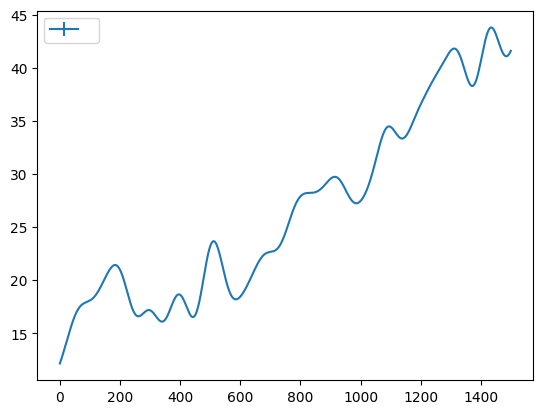

In [8]:
baseline = rc2.spectrum.from_delta_lines(deltas={}, xcal=lambda x: x*.5, nbins=3000)
baseline = baseline.add_baseline(n_freq=50, amplitude=10, pedestal=10, func=lambda x: x*.006 + x**2*.00001)
baseline.plot()

<Axes: >

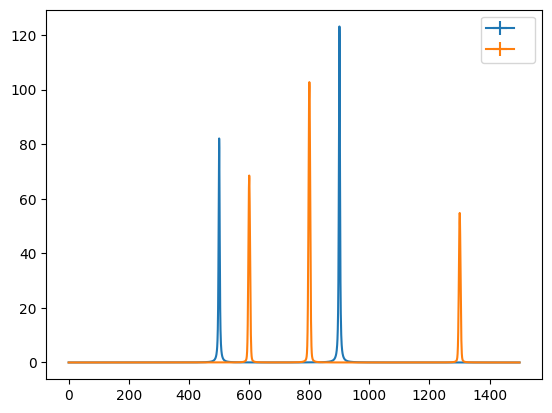

In [9]:
spe_e1 = rc2.spectrum.from_delta_lines(deltas={500:1e3, 900:1.5e3}, xcal=lambda x: x*.5, nbins=3000).convolve(lineshape='voigt', sigma=2, gamma=3)
spe_e2 = rc2.spectrum.from_delta_lines(deltas={600:1e3, 800:1.5e3, 1300:.8e3}, xcal=lambda x: x*.5, nbins=3000).convolve(lineshape='voigt', sigma=5, gamma=1)
ax = spe_e1.plot()
spe_e2.plot(ax=ax)

In [10]:
spe_map = {}
for conc in np.linspace(.3, .7, 5, endpoint=True):
    s = spe_e1*conc + spe_e2*(1-conc)
    s += baseline
    s = s.add_poisson_noise(.025).add_gaussian_noise(1)
    spe_map[conc] = s

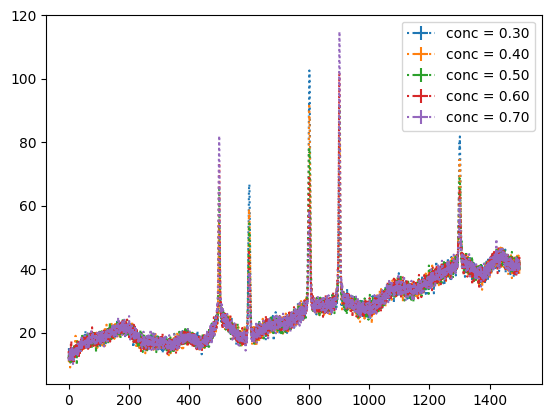

In [11]:
fig, ax = plt.subplots()
for c, s in spe_map.items():
    s.plot(ax=ax, fmt=':', label=f'conc = {c:.2f}')

In [12]:
conc = list(spe_map.keys())
xarray.DataArray(data=[s.y for s in spe_map.values()],
                 dims=['Concentration', 'Raman Shift'],
                 coords={'Concentration': conc, 'Raman Shift': baseline.x}
                )

<xarray.DataArray (Concentration: 5, Raman Shift: 3000)> Size: 120kB
array([[12.77963319, 11.88503782, 15.21131608, ..., 40.59949093,
        41.02842861, 43.03263858],
       [10.64555328, 10.69081627, 11.59389508, ..., 38.36213135,
        41.53138334, 38.93368657],
       [12.33410777, 11.89011694, 11.23779234, ..., 42.27500359,
        39.48974123, 41.18960007],
       [14.11038695, 11.4694398 , 12.04560848, ..., 41.0617796 ,
        43.89545672, 40.8699149 ],
       [11.20526341, 12.42465434, 11.79803046, ..., 39.31698324,
        41.42077624, 40.34550004]])
Coordinates:
  * Concentration  (Concentration) float64 40B 0.3 0.4 0.5 0.6 0.7
  * Raman Shift    (Raman Shift) float64 24kB 0.0 0.5 1.0 ... 1.499e+03 1.5e+03